In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import normalize

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import churn_library as churn_library

In [2]:
data_path = "../data/bank_data.csv"

df = churn_library.load_bank_data(data_path)

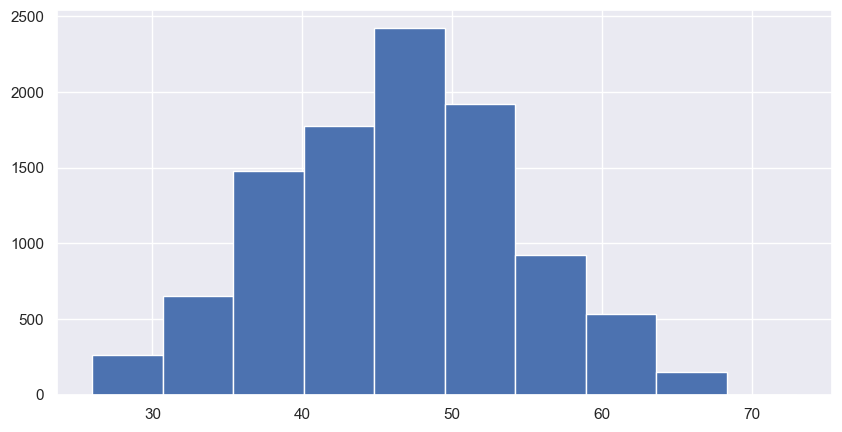

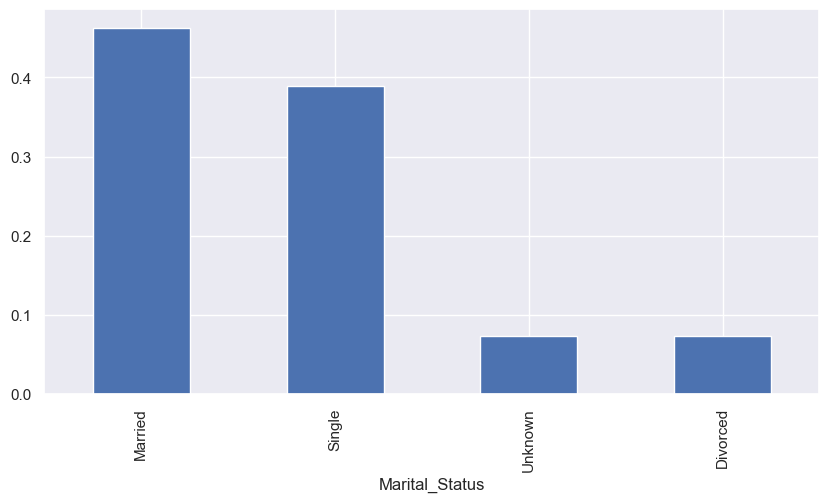

<Figure size 1000x500 with 0 Axes>

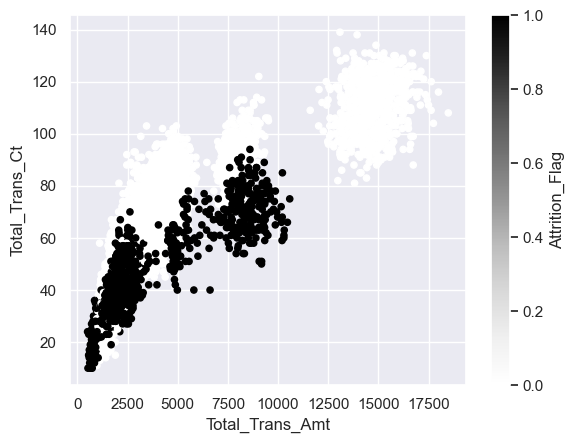

In [3]:
image_output_path = "../data/output_images"

churn_library.perform_eda(df, image_output_path)

In [4]:
keep_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book',
             'Total_Relationship_Count', 'Months_Inactive_12_mon',
             'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
             'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
             'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
             'Gender', 'Education_Level', 'Marital_Status', 
             'Income_Category', 'Card_Category']

X_train, X_test, y_train, y_test = churn_library.perform_feature_engineering(df, keep_cols, "Attrition_Flag")

In [5]:
# This cell may take up to 15-20 minutes to run

# grid search for random forests
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['log2', 'sqrt'],
    'max_depth' : [4,5,100],
    'criterion' :['gini', 'entropy']
}
rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)

lrc = LogisticRegression(solver='lbfgs', max_iter=3000)

churn_library.train_model(X_train, X_test, y_train, y_test, rfc, output_location="../data")
churn_library.train_model(X_train, X_test, y_train, y_test, lrc, output_location="../data")

AttributeError: module 'churn_library' has no attribute 'train_models'